In [1]:
import numpy as np
import pandas as pd
import datetime
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
account = pd.read_csv("archive/account.csv", sep = ';')
card = pd.read_csv("archive/card.csv", sep = ';')
client = pd.read_csv("archive/client.csv", sep = ';')

In [3]:
# Starting and end dates
start_date = datetime.datetime(1993,1,1)
end_date = datetime.datetime(1999,1,1)

In [4]:
# function to convert a date to (days after start_date)
def convert_date_to_days(x):
    td = x - start_date
    return td.days

In [5]:
# function to convert a date to age at end_date
def convert_to_age_days(x):
    td = end_date - x
    return td.days

In [6]:
#Converting the Card issued date to a datetime object

card['issued'] = pd.to_datetime(card['issued'].str[:6], format='%y%m%d')

# check the date column for null values

card['issued']

0     1993-11-07
1     1994-01-19
2     1994-02-05
3     1994-02-08
4     1994-02-15
         ...    
887   1998-12-26
888   1998-12-28
889   1998-12-28
890   1998-12-29
891   1998-12-29
Name: issued, Length: 892, dtype: datetime64[ns]

In [7]:
# check the date column for null values

card['issued'].isnull().sum()

0

In [8]:
#Convert the card issued date to days in number
card['card_issued_date'] = card['issued'].map(convert_date_to_days)
del card['issued']

In [9]:
client

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5
...,...,...,...
5364,13955,456030,1
5365,13956,430406,1
5366,13968,680413,61
5367,13971,626019,67


In [10]:
# functions to convert the format of the birth_number.

# returns the middle two digits

def get_mid2_dig(x):
    return int(x/100) % 100

# returns the month of birth_number column.
def get_month(x):
    mth = get_mid2_dig(x)
    if mth > 50:
        return mth - 50
    else:
        return mth

# return the month (of birth_number)
def get_day(x):
    return x % 100

# returns the year (of birth_number)
def get_year(x):
    return int(x/10000)

# determine the gender 
def get_gender(x):
    mth = get_mid2_dig(x)
    if mth > 50:
        return 'F'
    else:
        return 'M'

# convert the birth_number into date
def convert_int_to_date(x):
    yr = get_year(x) + 1900
    mth = get_month(x)
    day = get_day(x)
    return datetime.datetime(yr, mth, day)

# convert birth_number into age.
def convert_birthday_to_age(x):
    yr = get_year(x) + 1900
    mth = get_month(x)
    day = get_day(x)
    return convert_to_age_days(datetime.datetime(yr,mth,day))/365
    
client['client_age'] = client['birth_number'].map(convert_birthday_to_age)
client['client_gender'] = client['birth_number'].map(get_gender)
del client['birth_number']

In [11]:
client

,client_id,district_id,client_age,client_gender
0,1,18,28.071233,F
1,2,1,53.942466,M
2,3,1,58.268493,F
3,4,5,42.112329,M
4,5,5,38.523288,F
...,...,...,...,...
5364,13955,1,53.208219,F
5365,13956,1,55.778082,M
5366,13968,61,30.739726,M
5367,13971,67,36.227397,F


In [12]:
# rename columns in Card
card = card.rename(columns={'type': 'card_type'})
card.head()

,card_id,disp_id,card_type,card_issued_date
0,1005,9285,classic,310
1,104,588,classic,383
2,747,4915,classic,400
3,70,439,classic,403
4,577,3687,classic,410


In [13]:
# Rename columns in Client dataset.
client = client.rename(columns={'district_id': 'client_district_id'})
client.head()

,client_id,client_district_id,client_age,client_gender
0,1,18,28.071233,F
1,2,1,53.942466,M
2,3,1,58.268493,F
3,4,5,42.112329,M
4,5,5,38.523288,F


In [14]:
# Export the cleaned Client Data set
client.to_csv("cleaned_client.csv", index=False)

In [15]:
# Renaming columns for Account
account = account.rename(columns={'district_id': 'account_district_id'})

account.head()

,account_id,account_district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [16]:
#Converting date columns in the Account table
account['date'] = account['date'].map(convert_int_to_date)
account['account_date_opened'] = account['date'].map(convert_date_to_days)
del account['date']

account

,account_id,account_district_id,frequency,account_date_opened
0,576,55,POPLATEK MESICNE,0
1,3818,74,POPLATEK MESICNE,0
2,704,55,POPLATEK MESICNE,0
3,2378,16,POPLATEK MESICNE,0
4,2632,24,POPLATEK MESICNE,1
...,...,...,...,...
4495,124,55,POPLATEK MESICNE,1822
4496,3958,59,POPLATEK MESICNE,1822
4497,777,30,POPLATEK MESICNE,1822
4498,1573,63,POPLATEK MESICNE,1823


In [17]:
#Checking the frequency ofAccount table
account['frequency'].value_counts() # the unique values that occours in the table 

frequency
POPLATEK MESICNE      4167
POPLATEK TYDNE         240
POPLATEK PO OBRATU      93
Name: count, dtype: int64

In [18]:
# Translate frequency of transactions to English.
def convert_freq_to_eng(x):
    if x == 'POPLATEK MESICNE':
        return 'MONTHLY'
    elif x == 'POPLATEK TYDNE':
        return 'WEEKLY'
    elif x == 'POPLATEK PO OBRATU':
        return 'TRANSACTION'
    else:
        return 'UNKNOWN'
    
account['frequency'] = account['frequency'].map(convert_freq_to_eng) # replace the values in the series with newly data

In [19]:
# Renaming columns for Account

account = account.rename(columns={'frequency': 'statement_freq'})
account.head()

,account_id,account_district_id,statement_freq,account_date_opened
0,576,55,MONTHLY,0
1,3818,74,MONTHLY,0
2,704,55,MONTHLY,0
3,2378,16,MONTHLY,0
4,2632,24,MONTHLY,1


In [20]:
# Export the cleaned Account Data set
account.to_csv("cleaned_account.csv", index=False)

In [21]:
# Export the cleaned Card Data set
card.to_csv("cleaned_card.csv", index=False)

(array([  6., 150., 426., 345., 387., 358., 382., 372., 344., 371., 372.,
        392., 367., 254., 205., 189., 186., 185.,  66.,  12.]),
 array([11.27123288, 15.0790411 , 18.88684932, 22.69465753, 26.50246575,
        30.31027397, 34.11808219, 37.92589041, 41.73369863, 45.54150685,
        49.34931507, 53.15712329, 56.96493151, 60.77273973, 64.58054795,
        68.38835616, 72.19616438, 76.0039726 , 79.81178082, 83.61958904,
        87.42739726]),
 <BarContainer object of 20 artists>)

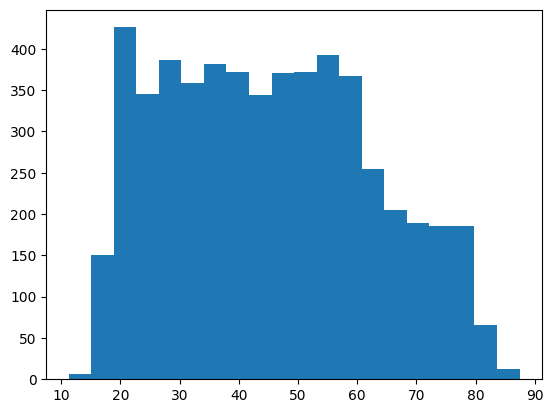

In [22]:
#Plotting age of clients
plt.hist(client['client_age'], 20)

array([<Axes: title={'center': 'count'}, xlabel='client_gender'>],
      dtype=object)

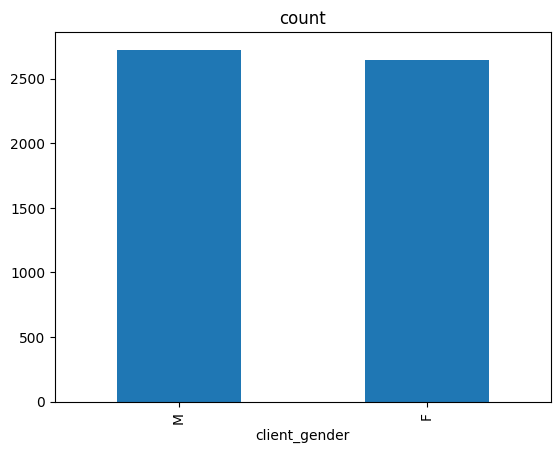

In [23]:
#Plotting gender of clients
client['client_gender'].value_counts().plot(kind='bar', subplots=True)

In [25]:
loan = pd.read_csv('archive/loan.csv', sep=';')

In [26]:
loan

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A
...,...,...,...,...,...,...,...
677,4989,105,981205,352704,48,7348.0,C
678,5221,1284,981205,52512,12,4376.0,C
679,6402,6922,981206,139488,24,5812.0,C
680,5346,1928,981206,55632,24,2318.0,C


In [27]:
# 'A' stands for contract finished, no problems,

# 'B' stands for contract finished, loan not payed,

# 'C' stands for running contract, OK so far,

# 'D' stands for running contract, client in debt

In [28]:
merged_data = pd.merge_ordered(account, loan, on='account_id', how='left')
features = ['account_id', 'loan_id', 'account_district_id', 'statement_freq', 'account_date_opened', 'amount', 'duration', 'payments']
df = merged_data[features + ['status']].dropna() 
del merged_data
df

,account_id,loan_id,account_district_id,statement_freq,account_date_opened,amount,duration,payments,status
1,2,4959.0,1,MONTHLY,56,80952.0,24.0,3373.0,A
18,19,4961.0,21,MONTHLY,826,30276.0,12.0,2523.0,B
24,25,4962.0,68,MONTHLY,1304,30276.0,12.0,2523.0,A
35,37,4967.0,20,MONTHLY,1690,318480.0,60.0,5308.0,D
36,38,4968.0,19,WEEKLY,1680,110736.0,48.0,2307.0,C
...,...,...,...,...,...,...,...,...,...
4493,11327,7294.0,7,MONTHLY,1748,39168.0,24.0,1632.0,C
4494,11328,7295.0,54,MONTHLY,1404,280440.0,60.0,4674.0,C
4496,11349,7304.0,1,WEEKLY,875,419880.0,60.0,6998.0,C
4497,11359,7305.0,61,MONTHLY,638,54024.0,12.0,4502.0,A


In [29]:
df.to_csv("df_model.csv", index=False)